In [2]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [45]:
from sympy import Symbol, symbols, solve, lambdify
from sympy import init_printing
init_printing()
#observables
n1, n2 =  symbols('n1 n2')
#parameters
s1, s2, b1, b2, mu =  symbols('s1 s2 b1 b2 mu')
#helpers
(n1, n2) =  symbols('n1 n2')
#estimators
muhat = symbols('muhat')

nu1 = muhat*s1+b1
nu2 = muhat*s2+b2

#solve for L'=0
[expr1, expr2] = solve( s1+s2 - n1*s1/nu1 - n2*s2/nu2, muhat)

In [44]:
muhatFunc = lambdify((n1,n2,b1,b2,s1,s2),expr2)
#test if that works
muhatFunc(10,10,5,5,5,5),muhatFunc(15,25,5,15,5,5)

In [6]:
def lambda0(muhat,n,b,s):
    return 2*(-muhat*s + n*np.log(1+(muhat*s)/b))

def q0_oneBin_DGSS(n,b,s):
    muhat = float((n-b))/float(s)
    q = lambda0(muhat,n,b,s)
    return q

def q0_twoBin_DGSS(n1,n2,b1,b2,s1,s2):
    muhat = muhatFunc(n1,n2,b1,b2,s1,s2)
    q1 = lambda0(muhat,n1,b1,s1)
    q2 = lambda0(muhat,n2,b2,s2)
    return q1+q2

def q0_profile(n,b,s):
    return 2*(-(n-b)+n*np.log(np.divide(n,b)))

In [7]:
def get_roc(s1,s2,b_bin1_expts,b_bin2_expts,sb_bin1_expts,sb_bin2_expts):
    q0_b_dgss  = [q0_twoBin_DGSS(n1,n2,b1val,b2val,s1,s2) for n1,n2 in zip(b_bin1_expts,b_bin2_expts)];
    q0_sb_dgss = [q0_twoBin_DGSS(n1,n2,b1val,b2val,s1,s2) for n1,n2 in zip(sb_bin1_expts,sb_bin2_expts)];
    
    plt.clf()
    pylab.yscale('symlog',linthreshy=1) #works for histograms
    q0_b_dgss_hist = plt.hist(q0_b_dgss, bins = np.linspace(0,100,100), alpha = 0.3, color = 'b')
    q0_sb_dgss_hist = plt.hist(q0_sb_dgss, bins = q0_b_dgss_hist[1], alpha = 0.3, color = 'r')
    
    integral_b = 1-np.cumsum(q0_b_dgss_hist[0])/np.sum(q0_b_dgss_hist[0])
    integral_sb = 1-np.cumsum(q0_sb_dgss_hist[0])/np.sum(q0_sb_dgss_hist[0])
    
    return integral_b,integral_sb

In [12]:
nexpts = 100000

b1val = 30.
s1val = 10.
b_bin1_expts = np.random.poisson(b1val,nexpts)
sb_bin1_expts = np.random.poisson(s1val+b1val,nexpts)

b2val = 30.
s2val = 12.
b_bin2_expts = np.random.poisson(b2val,nexpts)
sb_bin2_expts = np.random.poisson(s2val+b2val,nexpts)

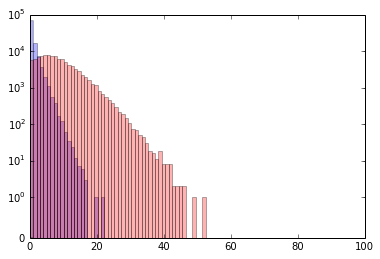

In [16]:
#this should give the optimal ROC, since we put in the correct signal contributions (i.e. 10,12)

roc1 = get_roc(s1val,s2val,b_bin1_expts,b_bin2_expts,sb_bin1_expts,sb_bin2_expts)

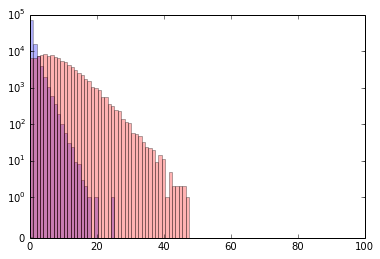

In [35]:
#say in from run 1 we estimated that the signal yields are not 10,12 but 5,17, we expect to get a worse test.

#from run 1
nexpts_run1 = 10
s1hat = np.random.poisson(s1val+b1val,nexpts_run1)-b1val
s2hat = np.random.poisson(s1val+b2val,nexpts_run1)-b2val

#filter for expts in which we see excess (s_i>0)
si_pairs = filter(lambda x: x[0]>0 and x[1]>0,zip(s1hat,s2hat))
roc2 = [get_roc(x[0],x[1],b_bin1_expts,b_bin2_expts,sb_bin1_expts,sb_bin2_expts) for x in si_pairs]

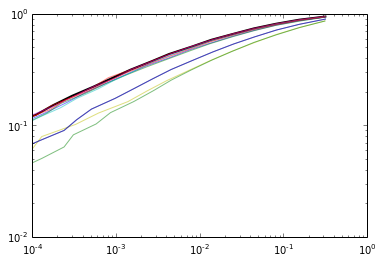

In [41]:
plt.loglog()
plt.ylim(1e-2,1)
plt.xlim(1e-4,1)
plt.plot(roc1[0],roc1[1],lw=2, color = 'black')
for roc2_res in roc2:
    plt.plot(roc2_res[0],roc2_res[1],lw=1, alpha = 0.5)